In [1]:
#CA03 - DECISION TREE ALGORITHM

In [2]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
#reading data into df
url = 'https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true'
data = pd.read_csv(url, encoding = "ISO-8859-1")
data2 = pd.read_csv(url, encoding = "ISO-8859-1")

In [4]:
#PART1
#1. DATA QUALITY ANALYSIS (DQA)

In [5]:
#checking the number of records and fields
data.shape

(48842, 11)

In [6]:
#checking the data type of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [7]:
#checking the first five records to understand the data
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [8]:
#checking the last five records to understand the data
data.tail()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


In [9]:
#Missing values
data.isna().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [10]:
#Cleaning the Dataset

In [11]:
#These are the final columns we will be using
#There are no missing values
#There are no columns to be dropped
data.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

In [12]:
#2. EXPLORATORY DATA ANALYSIS (EDA)

In [13]:
data_original = data2

In [14]:
#checking the values of a column before the transformation
data['age_bin'].unique()

array(['d. 36-40 & 56-60', 'e. 40-55', 'b. 26-30 & 71-100',
       'c. 31-35 & 61-70', 'a. 0-25'], dtype=object)

In [15]:
label_encoder = preprocessing.LabelEncoder()

#Encoding labels in columns
data['hours_per_week_bin']= label_encoder.fit_transform(data['hours_per_week_bin']) 
data['occupation_bin']= label_encoder.fit_transform(data['occupation_bin'])
data['msr_bin']= label_encoder.fit_transform(data['msr_bin']) 
data['capital_gl_bin']= label_encoder.fit_transform(data['capital_gl_bin']) 
data['race_sex_bin']= label_encoder.fit_transform(data['race_sex_bin']) 
data['education_bin']= label_encoder.fit_transform(data['education_bin'])  
data['age_bin']= label_encoder.fit_transform(data['age_bin'])
data['education_num_bin']= label_encoder.fit_transform(data['education_num_bin'])
data['workclass_bin']= label_encoder.fit_transform(data['workclass_bin']) 

In [16]:
data

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,1,1,2,2,2,2,1,3,train,0
1,0,4,2,0,2,2,2,1,4,train,0
2,1,0,1,0,2,1,1,1,3,train,0
3,1,0,2,0,1,0,0,1,4,train,0
4,1,4,2,0,0,2,2,1,1,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,1,4,1,0,1,2,2,1,3,test,0
48838,1,1,0,0,1,1,1,0,2,test,0
48839,3,4,2,0,2,2,2,1,3,test,0
48840,1,1,0,2,2,2,2,1,4,test,0


In [17]:
#confirming values are encoded
data['age_bin'].unique()

array([3, 4, 1, 2, 0])

In [18]:
def flag_func(name_col, nums):
  list_result = []
  for num in range(nums):
    list_result.append(len(data[name_col][(data.y == 0) & (data[name_col] == num)])/len(data[name_col][(data[name_col] == num)]))
  alternate_list = []
  for result in list_result:
    alternate_list.append(1-result)
  temp_data = pd.DataFrame(zip(list_result, alternate_list), columns=[0,1], index=sorted(list(data_original[name_col].unique())))
  temp_data = temp_data * 100
  temp_data.plot.bar(stacked=True, title=name_col)
  return(temp_data)

,0,1
a. Low,94.033233,5.966767
b. Mid,87.093638,12.906362
c. High,68.372734,31.627266


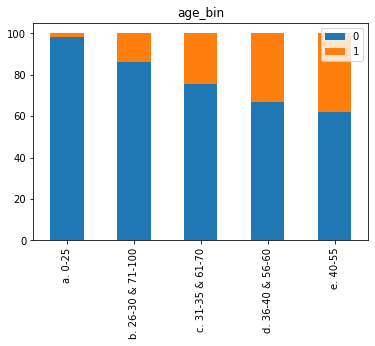

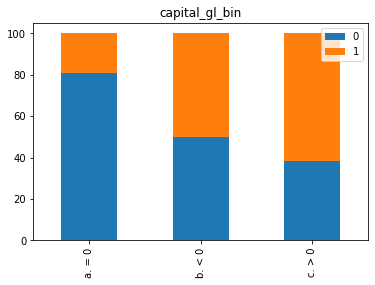

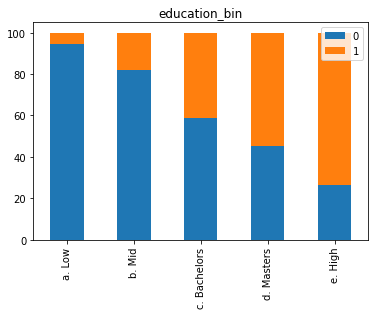

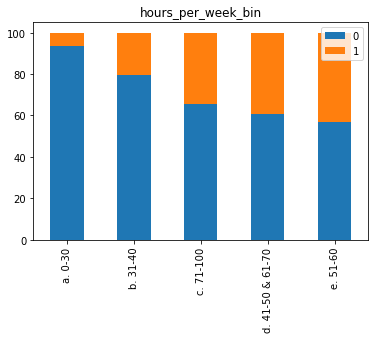

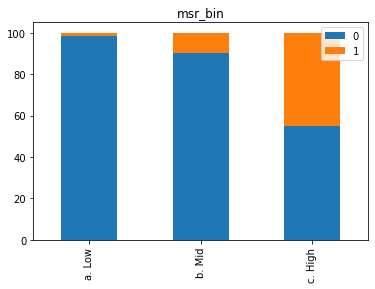

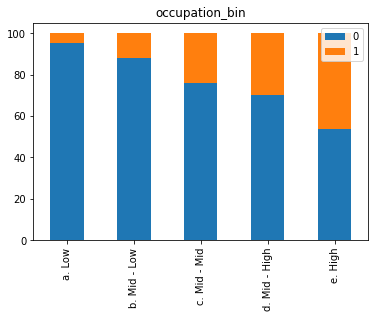

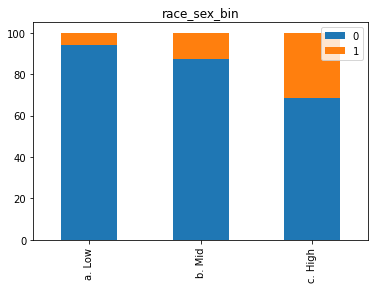

In [19]:
flag_func('age_bin', 5)
flag_func('capital_gl_bin', 3)
flag_func('education_bin', 5)
flag_func('hours_per_week_bin', 5)
flag_func('msr_bin', 3)
flag_func('occupation_bin', 5)
flag_func('race_sex_bin', 3)

#Click on the output line to see all graphs or scroll down inside the output window

In [20]:
#PART2
#3. BUILD DECISION TREE CLASSIFIER MODELS

In [21]:
#import the necessary packages for our decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state=99, max_features = None, min_samples_leaf = 1000, min_samples_split = 1000)

In [22]:
#splitting data
test_data = data[data.flag == 'test']
train_data = data[data.flag == 'train']

In [23]:
#selecting specific columns for analysis
y_train = train_data.y
y_test = test_data.y

x_train = train_data.drop(['flag', 'y'], axis = 'columns')
x_test = test_data.drop(['flag', 'y'], axis = 'columns')

In [24]:
#fitting model
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

In [25]:
#4. VIZUALIZE YOUR DECISION TREE USING GRAPHVIZ

In [26]:
#graphing the decison tree using the following packages.
from six import StringIO  
from IPython.display import Image  
!pip install pydotplus
import pydotplus
!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [27]:
#5. EVALUATE DECISION TREE PERFORMANCE

In [28]:
#Running tests to judge the accuracy of my model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11275,  1160],
       [ 1540,  2306]])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8341625207296849

In [30]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.8291558830865177

In [31]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.5995839833593344

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8311011724314925

0.7531494504653528


Text(0.5, 1.0, 'ROC curve')

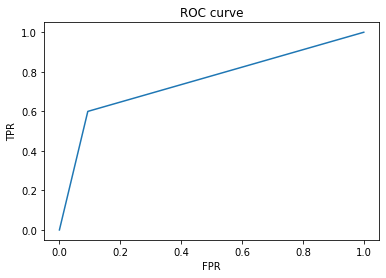

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

print(roc_auc_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [34]:
#PART 3
#6. TUNE DECISION TREE PERFORMANCE

In [35]:
#created a function to automatically run these tests for different criteria

def dtree_Scoring(criterion, depth, leaf, split):
  dtree = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=101,
                               max_features = None, min_samples_leaf = leaf, min_samples_split = split)
  dtree.fit(x_train, y_train)
  y_pred = dtree.predict(x_test)
  print('Scoring Chart for the following inputs:', 'criterion =',criterion, ',', 'depth =', depth,',', 'leaf =', leaf,',', 'split =', split)
  print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
  print('Accuracy Score: ', accuracy_score(y_test, y_pred))
  print('Precision Score: ',precision_score(y_test, y_pred, average='weighted'))
  print('Recall Score: ', recall_score(y_test, y_pred))
  print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))
  print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

  fpr, tpr, _ = roc_curve(y_test, y_pred)

  plt.plot(fpr, tpr)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC curve')

Scoring Chart for the following inputs: criterion = gini , depth = None , leaf = 250 , split = 500
Confusion Matrix:  [[11446   989]
 [ 1651  2195]]
Accuracy Score:  0.837847798046803
Precision Score:  0.8303435791516517
Recall Score:  0.5707228289131565
F1 Score:  0.8323151969285115
ROC AUC Score:  0.7455946271626499


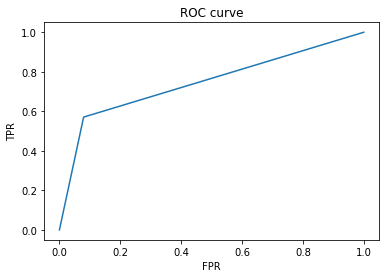

In [36]:
#Calling the function the different sets of criteria
dtree_Scoring('gini', None, 250, 500)

Scoring Chart for the following inputs: criterion = gini , depth = 4 , leaf = 250 , split = 500
Confusion Matrix:  [[11605   830]
 [ 1866  1980]]
Accuracy Score:  0.8344082058841594
Precision Score:  0.8244272082794002
Recall Score:  0.514820592823713
F1 Score:  0.8248321729578761
ROC AUC Score:  0.7240367539912694


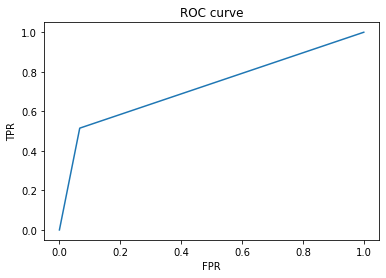

In [37]:
dtree_Scoring('gini', 4, 250, 500)

Scoring Chart for the following inputs: criterion = gini , depth = None , leaf = 400 , split = 500
Confusion Matrix:  [[11513   922]
 [ 1754  2092]]
Accuracy Score:  0.8356366316565321
Precision Score:  0.8267602254815588
Recall Score:  0.5439417576703068
F1 Score:  0.8283297120698255
ROC AUC Score:  0.7348981003872241


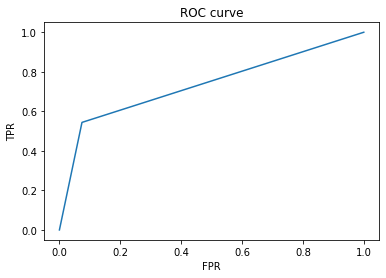

In [38]:
dtree_Scoring('gini', None, 400, 500)

Scoring Chart for the following inputs: criterion = gini , depth = None , leaf = 250 , split = 600
Confusion Matrix:  [[11446   989]
 [ 1651  2195]]
Accuracy Score:  0.837847798046803
Precision Score:  0.8303435791516517
Recall Score:  0.5707228289131565
F1 Score:  0.8323151969285115
ROC AUC Score:  0.7455946271626499


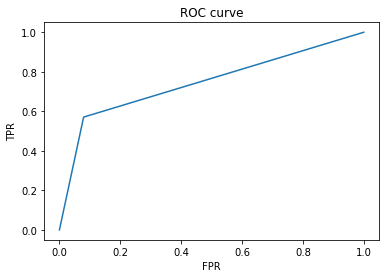

In [39]:
dtree_Scoring('gini', None, 250, 600)

Scoring Chart for the following inputs: criterion = entropy , depth = None , leaf = 250 , split = 500
Confusion Matrix:  [[11470   965]
 [ 1659  2187]]
Accuracy Score:  0.8388305386647011
Precision Score:  0.8311666007765293
Recall Score:  0.5686427457098284
F1 Score:  0.8330265329912792
ROC AUC Score:  0.745519603655075


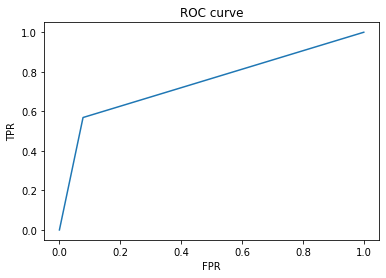

In [40]:
dtree_Scoring('entropy', None, 250, 500)

Scoring Chart for the following inputs: criterion = entropy , depth = 4 , leaf = 250 , split = 500
Confusion Matrix:  [[11605   830]
 [ 1866  1980]]
Accuracy Score:  0.8344082058841594
Precision Score:  0.8244272082794002
Recall Score:  0.514820592823713
F1 Score:  0.8248321729578761
ROC AUC Score:  0.7240367539912694


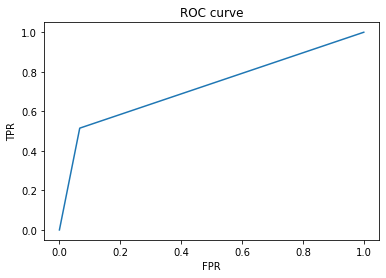

In [41]:
dtree_Scoring('entropy', 4, 250, 500)

Scoring Chart for the following inputs: criterion = entropy , depth = None , leaf = 400 , split = 500
Confusion Matrix:  [[11394  1041]
 [ 1625  2221]]
Accuracy Score:  0.8362508445427185
Precision Score:  0.8292808741603134
Recall Score:  0.5774830993239729
F1 Score:  0.831402428824731
ROC AUC Score:  0.7468838898308647


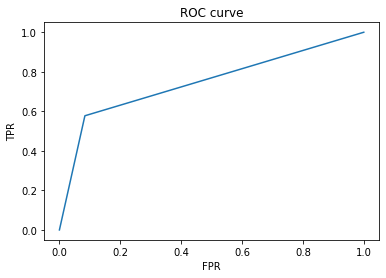

In [42]:
dtree_Scoring('entropy', None, 400, 500)

Scoring Chart for the following inputs: criterion = gini , depth = None , leaf = 250 , split = 600
Confusion Matrix:  [[11446   989]
 [ 1651  2195]]
Accuracy Score:  0.837847798046803
Precision Score:  0.8303435791516517
Recall Score:  0.5707228289131565
F1 Score:  0.8323151969285115
ROC AUC Score:  0.7455946271626499


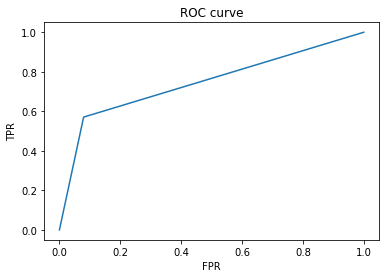

In [43]:
dtree_Scoring('gini', None, 250, 600)

In [44]:
#8. AUTOMATION OF PERFORMANCE TUNING
#Created a function to accept a list of different specifications then, score each attribute according to those specifications and append that to a list.
#After that has iterated through every feature in the list it creates a dataframe with all the data to easily display the information.
def dtree_Scoring_table(value_lists):
  criteria = ['criterion', 'depth', 'leaf', 'split']
  data_dict = []
  for values in value_lists:
      my_dict = {criteria[i]: values[i] for i in range(len(values))}
        
      dtree = DecisionTreeClassifier(criterion=my_dict['criterion'], max_depth=my_dict['depth'], random_state=101,
                                    max_features = None, min_samples_leaf = my_dict['leaf'], min_samples_split = my_dict['split'])
      dtree.fit(x_train, y_train)
      y_pred = dtree.predict(x_test)

      acc_score = accuracy_score(y_test, y_pred)
      rec_score = recall_score(y_test, y_pred)
      prec_score = precision_score(y_test, y_pred, average='weighted')
      scored_f = f1_score(y_test, y_pred, average='weighted')

      listed_values  = [my_dict['criterion'], my_dict['split'], my_dict['leaf'], my_dict['depth'], acc_score, rec_score, prec_score, scored_f]
      headers = ['Split Criteria', 'Minimum Sample Split', 'Minimum Sample Leaf', 'Maximum Depth', 'Accuracy', 'Recall', 'Precision', 'F1 Score']
      final_dict = {headers[i]: listed_values[i] for i in range(len(headers))}
      data_dict.append(final_dict)
  return pd.DataFrame(data_dict, columns=headers)

In [45]:
specifications = [['gini', None, 250, 500], ['gini', 4, 250, 500], ['gini', None, 400, 500], ['gini', None, 250, 600], ['entropy', None, 250, 500], ['entropy', 4, 250, 500], ['entropy', None, 400, 500], ['entropy', None, 250, 600]]

In [46]:
dtree_Scoring_table(specifications)

,Split Criteria,Minimum Sample Split,Minimum Sample Leaf,Maximum Depth,Accuracy,Recall,Precision,F1 Score
0,gini,500,250,NaN,0.837848,0.570723,0.830344,0.832315
1,gini,500,250,4.0,0.834408,0.514821,0.824427,0.824832
2,gini,500,400,NaN,0.835637,0.543942,0.826760,0.828330
3,gini,600,250,NaN,0.837848,0.570723,0.830344,0.832315
4,entropy,500,250,NaN,0.838831,0.568643,0.831167,0.833027
5,entropy,500,250,4.0,0.834408,0.514821,0.824427,0.824832
6,entropy,500,400,NaN,0.836251,0.577483,0.829281,0.831402
7,entropy,600,250,NaN,0.838831,0.568643,0.831167,0.833027


In [47]:
#7. CONCLUSION

In [48]:
%time 
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs


In [49]:
#Q8.1 the time was 10 microseconds

In [50]:
#Q8.2 The best tree in my tests was the one based on entropy with a minimum sample split of 500,
#minimum leaf size of 250 and no depth limit.

In [51]:
#Q8.3 The tree is graphed below

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=99,
                               max_features = None, min_samples_leaf = 250, min_samples_split = 500)

dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [52]:
#Q8.4 This is the best tree because it has the highest accuracy score without compromising much in regards to precision and recall.
#This model is likely to predict the right answer with similar precision and recall scores to its competitors.

In [53]:
#PART 4
#8. AUTOMATION OF PERFORMANCE TUNING
#Already answered 9 input rows back

In [54]:
#PART 5
#9. PREDICTION USING YOUR 'TRAINED' DECISION TREE MODEL
import numpy as np
new_test = [3, 1, 2, 2, 1, 1, 4, 1, 3]
new_test = np.array(new_test).reshape(1, -1)
y_pred = dtree.predict(new_test)
y_pred

array([1])

In [55]:
#Q10.1 based on my tree I predict that the person's income is going to be greater than 50k.